In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.model_selection import train_test_split



In [25]:
df=pd.read_csv("House_Price.csv")
print(df)

     price  crime_rate  resid_area  air_qual  room_num   age  dist1  dist2  \
0     24.0     0.00632       32.31     0.538     6.575  65.2   4.35   3.81   
1     21.6     0.02731       37.07     0.469     6.421  78.9   4.99   4.70   
2     34.7     0.02729       37.07     0.469     7.185  61.1   5.03   4.86   
3     33.4     0.03237       32.18     0.458     6.998  45.8   6.21   5.93   
4     36.2     0.06905       32.18     0.458     7.147  54.2   6.16   5.86   
..     ...         ...         ...       ...       ...   ...    ...    ...   
501   22.4     0.06263       41.93     0.573     6.593  69.1   2.64   2.45   
502   20.6     0.04527       41.93     0.573     6.120  76.7   2.44   2.11   
503   23.9     0.06076       41.93     0.573     6.976  91.0   2.34   2.06   
504   22.0     0.10959       41.93     0.573     6.794  89.3   2.54   2.31   
505   19.0     0.04741       41.93     0.573     6.030  80.8   2.72   2.24   

     dist3  dist4  teachers  poor_prop airport  n_hos_beds  n_h

In [27]:
df.isnull().sum()

price            0
crime_rate       0
resid_area       0
air_qual         0
room_num         0
age              0
dist1            0
dist2            0
dist3            0
dist4            0
teachers         0
poor_prop        0
airport          0
n_hos_beds       8
n_hot_rooms      0
waterbody      155
rainfall         0
bus_ter          0
parks            0
dtype: int64

In [29]:
print('dtypes: ',df.dtypes)

dtypes:  price          float64
crime_rate     float64
resid_area     float64
air_qual       float64
room_num       float64
age            float64
dist1          float64
dist2          float64
dist3          float64
dist4          float64
teachers       float64
poor_prop      float64
airport         object
n_hos_beds     float64
n_hot_rooms    float64
waterbody       object
rainfall         int64
bus_ter         object
parks          float64
dtype: object


In [31]:
shape = df.shape  
print('Number of columns :', shape[1]) 

Number of columns : 19


In [33]:
df['waterbody']=df['waterbody'].fillna(np.nan)
print(df)

     price  crime_rate  resid_area  air_qual  room_num   age  dist1  dist2  \
0     24.0     0.00632       32.31     0.538     6.575  65.2   4.35   3.81   
1     21.6     0.02731       37.07     0.469     6.421  78.9   4.99   4.70   
2     34.7     0.02729       37.07     0.469     7.185  61.1   5.03   4.86   
3     33.4     0.03237       32.18     0.458     6.998  45.8   6.21   5.93   
4     36.2     0.06905       32.18     0.458     7.147  54.2   6.16   5.86   
..     ...         ...         ...       ...       ...   ...    ...    ...   
501   22.4     0.06263       41.93     0.573     6.593  69.1   2.64   2.45   
502   20.6     0.04527       41.93     0.573     6.120  76.7   2.44   2.11   
503   23.9     0.06076       41.93     0.573     6.976  91.0   2.34   2.06   
504   22.0     0.10959       41.93     0.573     6.794  89.3   2.54   2.31   
505   19.0     0.04741       41.93     0.573     6.030  80.8   2.72   2.24   

     dist3  dist4  teachers  poor_prop airport  n_hos_beds  n_h

In [35]:
print(df.isnull().sum())

price            0
crime_rate       0
resid_area       0
air_qual         0
room_num         0
age              0
dist1            0
dist2            0
dist3            0
dist4            0
teachers         0
poor_prop        0
airport          0
n_hos_beds       8
n_hot_rooms      0
waterbody      155
rainfall         0
bus_ter          0
parks            0
dtype: int64


In [37]:
print("Iterating through columns:")
for column in df.columns:
    if df[column].dtype == 'object':
        df[column].fillna('Unknown', inplace=True)  # Handle null object values
        label_encoder = LabelEncoder()
        df[column] = label_encoder.fit_transform(df[column])
        print(f"Encoded column - {column}:")
        print(df[column])

Iterating through columns:
Encoded column - airport:
0      1
1      0
2      0
3      1
4      0
      ..
501    0
502    1
503    0
504    1
505    1
Name: airport, Length: 506, dtype: int64
Encoded column - waterbody:
0      2
1      0
2      3
3      0
4      0
      ..
501    1
502    1
503    3
504    3
505    3
Name: waterbody, Length: 506, dtype: int64
Encoded column - bus_ter:
0      0
1      0
2      0
3      0
4      0
      ..
501    0
502    0
503    0
504    0
505    0
Name: bus_ter, Length: 506, dtype: int64


/var/folders/t0/76hgws5j7rg04vg7shr44l0c0000gn/T/ipykernel_49077/4235902008.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[column].fillna('Unknown', inplace=True)  # Handle null object values
/var/folders/t0/76hgws5j7rg04vg7shr44l0c0000gn/T/ipykernel_49077/4235902008.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we 

In [39]:
df.fillna(df.mean(), inplace=True)

In [41]:
print(df.isnull().sum().sum())

0


In [43]:
# le=LabelEncoder()
# df['waterbody']=le.fit_transform(df['waterbody'])
# df['airport']=le.fit_transform(df['airport'])
# df['bus_ter']=le.fit_transform(df['bus_ter'])
# print(df.head(6))

In [45]:
x=df.iloc[:,1:]
print(x)

     crime_rate  resid_area  air_qual  room_num   age  dist1  dist2  dist3  \
0       0.00632       32.31     0.538     6.575  65.2   4.35   3.81   4.18   
1       0.02731       37.07     0.469     6.421  78.9   4.99   4.70   5.12   
2       0.02729       37.07     0.469     7.185  61.1   5.03   4.86   5.01   
3       0.03237       32.18     0.458     6.998  45.8   6.21   5.93   6.16   
4       0.06905       32.18     0.458     7.147  54.2   6.16   5.86   6.37   
..          ...         ...       ...       ...   ...    ...    ...    ...   
501     0.06263       41.93     0.573     6.593  69.1   2.64   2.45   2.76   
502     0.04527       41.93     0.573     6.120  76.7   2.44   2.11   2.46   
503     0.06076       41.93     0.573     6.976  91.0   2.34   2.06   2.29   
504     0.10959       41.93     0.573     6.794  89.3   2.54   2.31   2.40   
505     0.04741       41.93     0.573     6.030  80.8   2.72   2.24   2.64   

     dist4  teachers  poor_prop  airport  n_hos_beds  n_hot_roo

In [47]:
y=df.iloc[:,0]
print(y)

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    19.0
Name: price, Length: 506, dtype: float64


In [49]:
print(x.isnull().sum().sum())

0


In [51]:
#Scale the features
scaler=StandardScaler()
X_scaled=scaler.fit_transform(x)

In [53]:
x_train,x_test,y_train,y_test=train_test_split(X_scaled,y,test_size=0.2,random_state=42)

In [55]:
#Train the LinearRegression model
lr=LinearRegression()
lr.fit(x_train, y_train)

LinearRegression()

In [57]:
#make prediction
y_pred=lr.predict(x_test)

In [59]:
mse=mean_squared_error(y_test,y_pred)
print("\nMean Squared Error: ",mse)


Mean Squared Error:  25.794887804572596


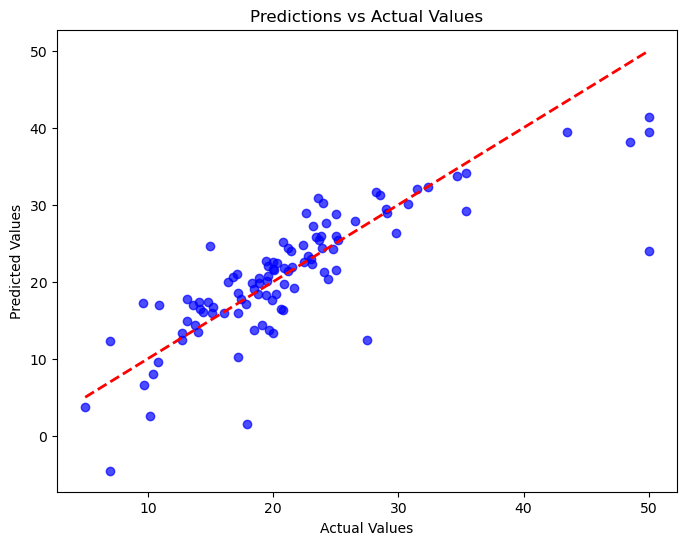

In [61]:
# Visualize the predictions vs. actual values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.7, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r', linewidth=2)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Predictions vs Actual Values")
plt.show()